In [2]:
import csv
import json
import sys, pymysql
import pandas as pd

#與MySQL建立連線
conn = pymysql.connect(host='localhost',port=3306,user='root',password='123456',db='pm25')
cursor = conn.cursor()
try:
    sql_str="select * from pm25_2019"
    cursor.execute(sql_str)
    result = cursor.fetchall()
    l = len(result)
    list_data = []
    for i in range(5):
        for row in result:
            list_row = list(row)
            list_data.append(list_row)
except:
    print('unable to fetch data from db')

cursor.close()
conn.close() 

df = pd.DataFrame(list_data,columns=['timestamp','date','time','device_id','Temperature','Humidity','PM25'])
df['PM25'] = df['PM25'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df["hour"] = df['time'].astype(str).str.split(':',expand = True)[0].str.split(' ',expand = True)[2].astype(int)
#print(list_data)

data = pd.DataFrame(df,columns=['hour', 'Temperature', 'Humidity', 'PM25'])
df

,timestamp,date,time,device_id,Temperature,Humidity,PM25,hour
0,2019-11-04T09:07:48Z,2019-11-04,09:07:48,FT2_0041,24.74,65.89,17,9
1,2019-11-04T10:00:52Z,2019-11-04,10:00:52,FT2_0041,24.66,66.01,14,10
2,2019-11-04T11:00:55Z,2019-11-04,11:00:55,FT2_0041,24.62,64.62,12,11
3,2019-11-04T12:00:58Z,2019-11-04,12:00:58,FT2_0041,24.27,64.53,9,12
4,2019-11-04T13:00:01Z,2019-11-04,13:00:01,FT2_0041,24.11,65.08,11,13
5,2019-11-04T14:00:05Z,2019-11-04,14:00:05,FT2_0041,24.01,65.89,12,14
6,2019-11-04T15:00:08Z,2019-11-04,15:00:08,FT2_0041,24.00,67.02,13,15
7,2019-11-04T16:00:28Z,2019-11-04,16:00:28,FT2_0041,23.97,67.13,15,16
8,2019-11-04T17:00:14Z,2019-11-04,17:00:14,FT2_0041,23.99,67.83,12,17
9,2019-11-04T18:00:16Z,2019-11-04,18:00:16,FT2_0041,23.91,68.99,16,18


In [325]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:3]
y = data.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 3)

In [244]:
#增加維度
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, #增加多項式階數
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

In [256]:
#線性回歸模型
import time
from sklearn.linear_model import LinearRegression

model = polynomial_model(degree=10)
#model = LinearRegression(normalize=True)

start = time.perf_counter()
model.fit(X_train,y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
#print('train_score:%.6f; cv_score:%.6f'%(train_score,cv_score))
print('訓練時間:%.6f; train_score:%.6f; cv_score:%.6f'%(time.perf_counter()-start,train_score,cv_score))

訓練時間:0.359913; train_score:0.829472; cv_score:0.782863


In [316]:
#儲存模型
from sklearn.externals import joblib
joblib.dump(model,"./LinearRegression.pkl")

['./LinearRegression.pkl']

elaspe: 6.902311


<Figure size 1296x288 with 0 Axes>

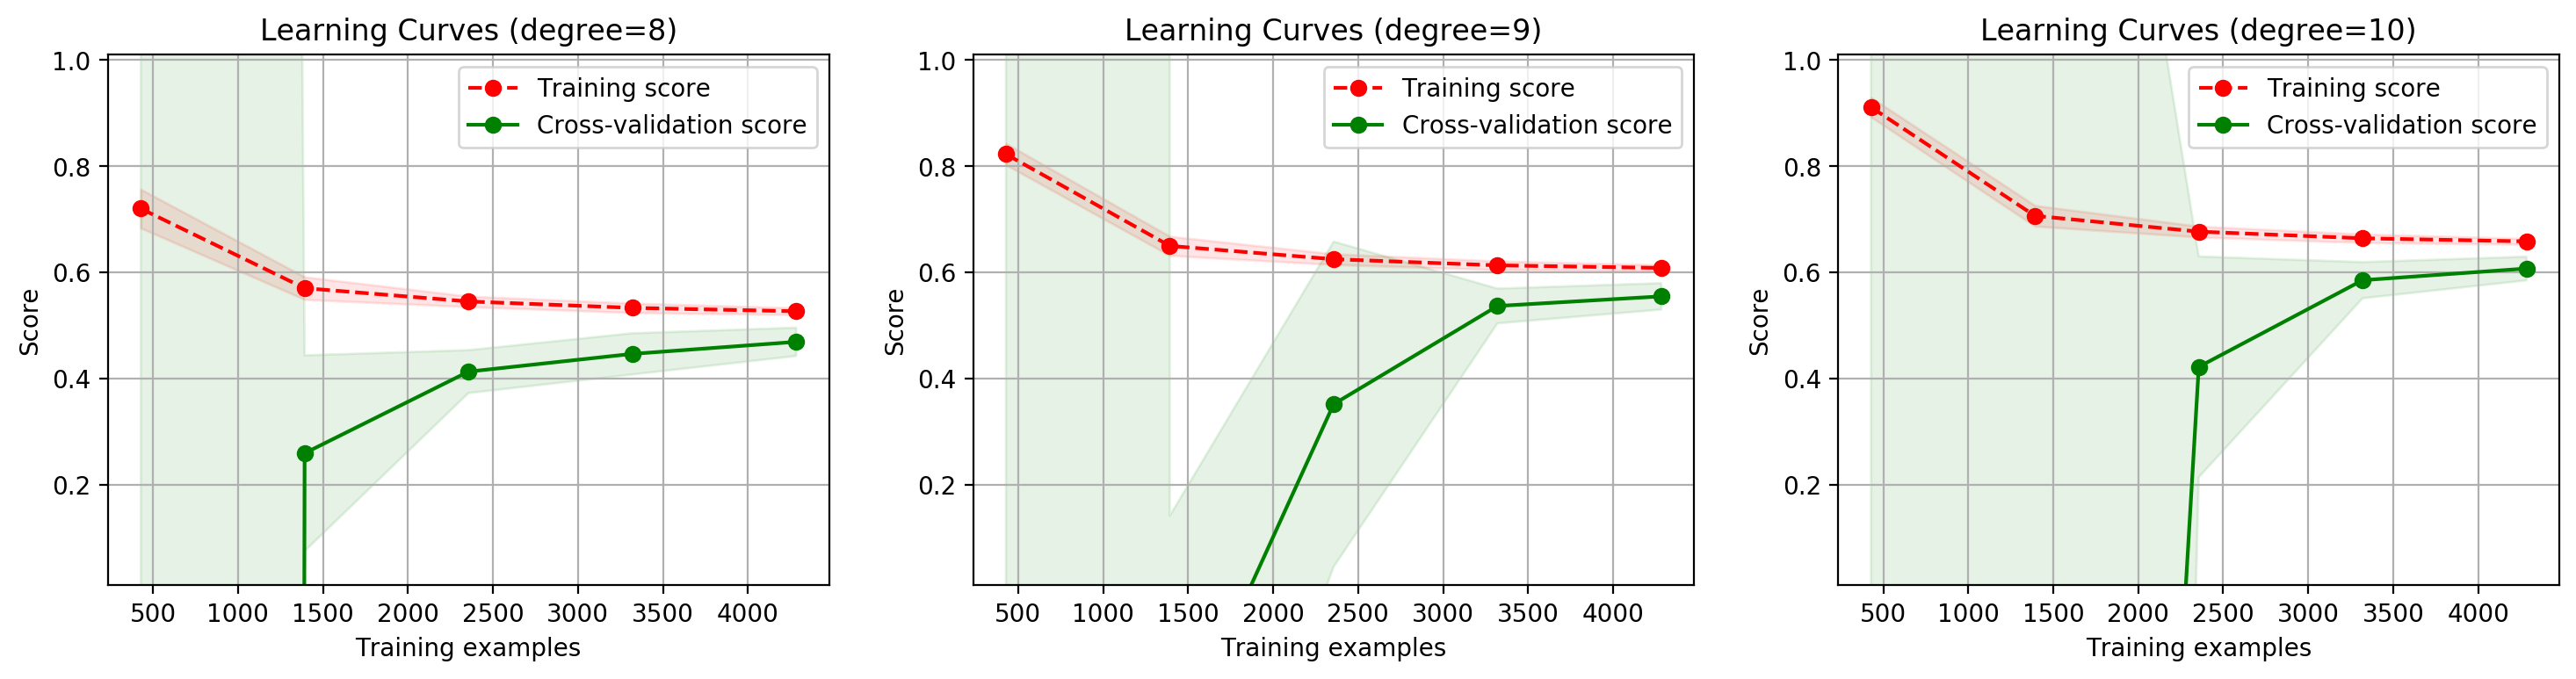

In [252]:
#建立學習曲線
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [8, 9, 10]

start = time.perf_counter()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

In [326]:
#線性回歸 Lasso
#增加維度
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, #增加多項式階數
                                             include_bias=False)
    linear_regression_lasso = linear_model.Lasso(alpha=0.1)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression_lasso", linear_regression_lasso)])
    return pipeline

In [330]:
#線性回歸 Lasso
import time
model = polynomial_model(degree=15)
#model = LinearRegression(normalize=True)

start = time.perf_counter()
model.fit(X_train,y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
#print('train_score:%.6f; cv_score:%.6f'%(train_score,cv_score))
print('訓練時間:%.6f; train_score:%.6f; cv_score:%.6f'%(time.perf_counter()-start,train_score,cv_score))

訓練時間:4.047007; train_score:0.184796; cv_score:0.177541


C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242092.28600429118, tolerance: 58.18595357142857
  positive)


C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17063.276514251083, tolerance: 5.444182242990655
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51435.998107956315, tolerance: 18.355781609195404
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81894.89450713055, tolerance: 31.928755178268254
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145677.5888938622, tolerance: 58.50401092436975
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14291.288716384934, tolerance: 5.969615654205607
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45290.54777179928, tolerance: 19.019806609195403
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25839.40690812339, tolerance: 5.472571962616823
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79747.86775241398, tolerance: 17.361962931034483
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144373.87970334935, tolerance: 30.855531536502543
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84096.06942983021, tolerance: 18.355781609195404
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146875.47538734908, tolerance: 31.928755178268254
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206882.42078411812, tolerance: 44.520382650602414
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143684.03427844206, tolerance: 31.210771604414262
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198351.70402324953, tolerance: 42.89820045180723
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263507.1417797027, tolerance: 56.91612773109244
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205996.53545141857, tolerance: 44.775966746987955
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265167.37101099826, tolerance: 57.05637058823529
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26984.579393062813, tolerance: 5.8259065420560745
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268406.0493192002, tolerance: 58.6806803688142
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28526.781933931914, tolerance: 6.180222429906542
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86924.72204171884, tolerance: 19.247289655172416
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140300.55107576272, tolerance: 31.03321031409168
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202853.5047256722, tolerance: 44.527068795180725
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263453.1397149131, tolerance: 57.971797665732964
  positive)
C:\Users\Big data\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

elaspe: 19.919329


<Figure size 1296x288 with 0 Axes>

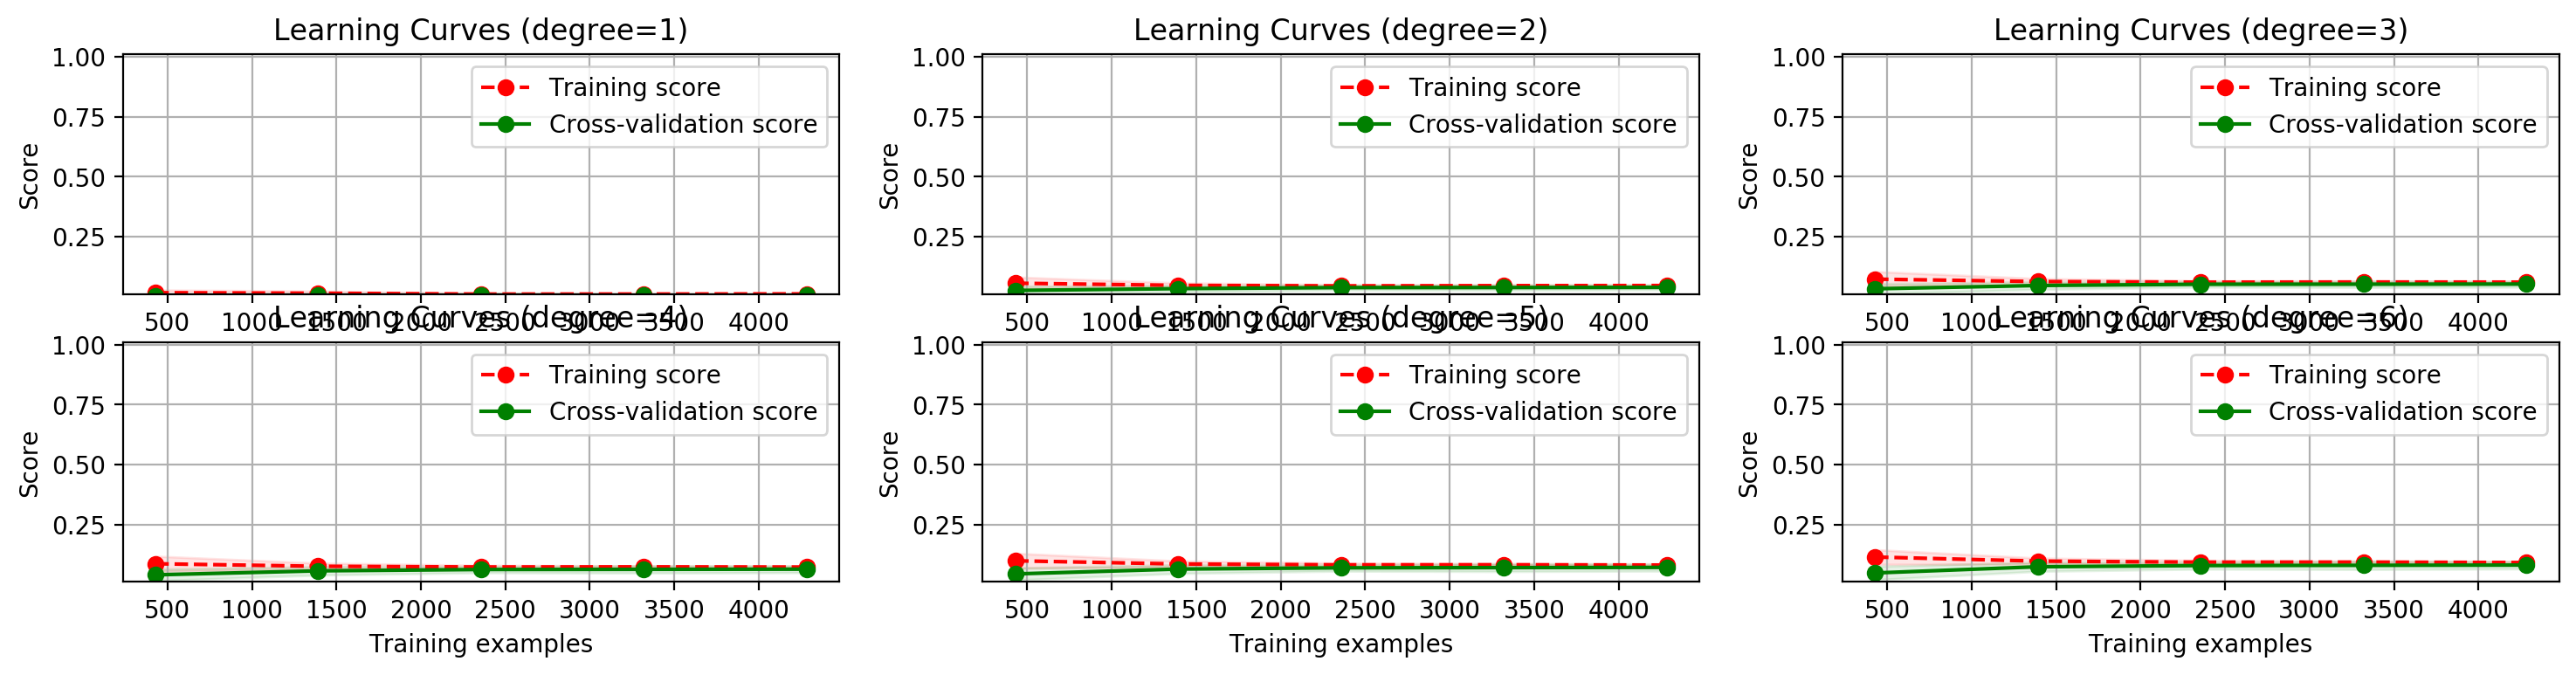

In [328]:
#建立學習曲線
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4))
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3, 4, 5, 6]

start = time.perf_counter()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(2, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.perf_counter()-start))

In [3]:
X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5000:5355,0:3]
y_test = data.iloc[5000:5355,3]

決策數

In [275]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:3]
y = data.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
#決策數訓練 (最佳值)
from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier(min_samples_split=11)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 1.0


In [5]:
from sklearn.tree import export_graphviz

with open("titanic.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)

# 1. 在电脑上安装 graphviz
# 2. 运行 `dot -Tpng titanic.dot -o titanic.png` 
# 3. 在当前目录查看生成的决策树 titanic.png

In [300]:
#參數選擇max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

In [303]:
#交叉驗證最佳參數
depths = range(2, 25)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('best_param:%d; best_score:%.6f'%(best_param,best_score))

best_param:24; best_score:1.000000


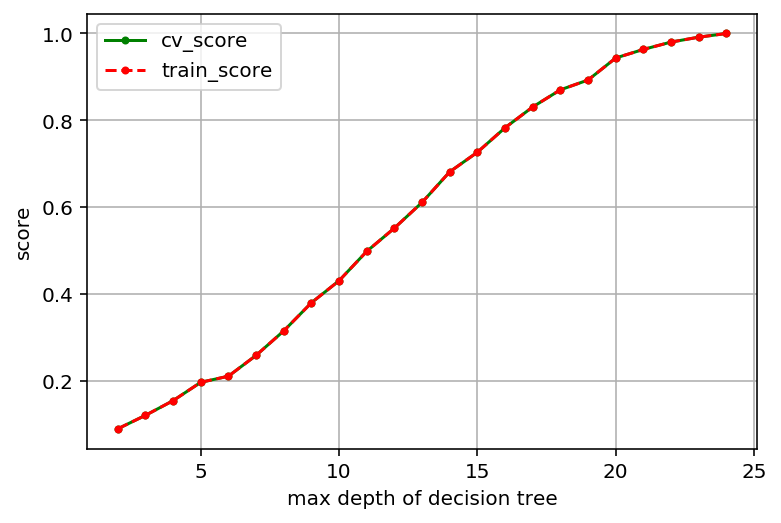

In [304]:
#畫圖
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cv_score')
plt.plot(depths, cv_scores, '.r--', label='train_score')
plt.legend()

In [305]:
#參數選擇min_samples_split
def cv_score(val):
    clf = DecisionTreeClassifier(min_samples_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

In [310]:
#交叉驗證最佳參數
values = range(5, 15)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best_param:%d; best_score:%.6f'%(best_param,best_score))

best_param:5; best_score:1.000000


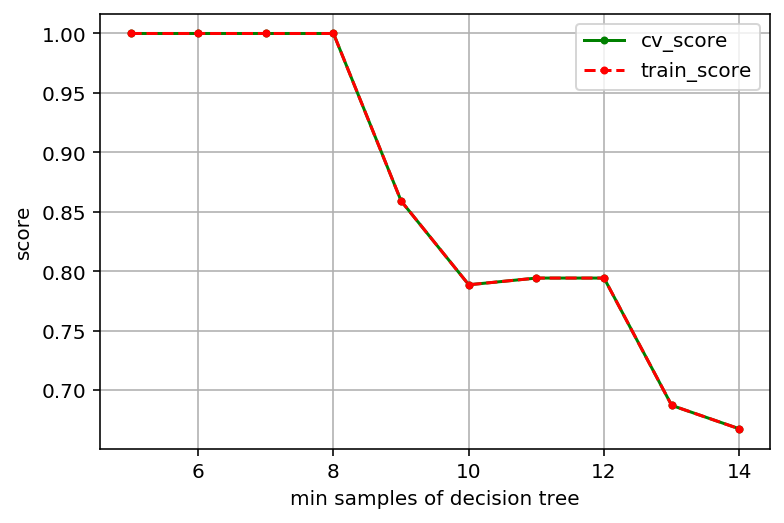

In [311]:
#畫圖
plt.figure(figsize=(6,4), dpi=144)
plt.grid()
plt.xlabel('min samples of decision tree')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cv_score')
plt.plot(values, cv_scores, '.r--', label='train_score')
plt.legend()

In [313]:
#決策數訓練 (最佳值)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_split=11)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.8436; test score: 0.7943661971830986


In [318]:
#儲存模型
from sklearn.externals import joblib
joblib.dump(clf,"./DecisionTreeClassifier.pkl")

['./DecisionTreeClassifier.pkl']

best param: 0.0; best score: 1.0


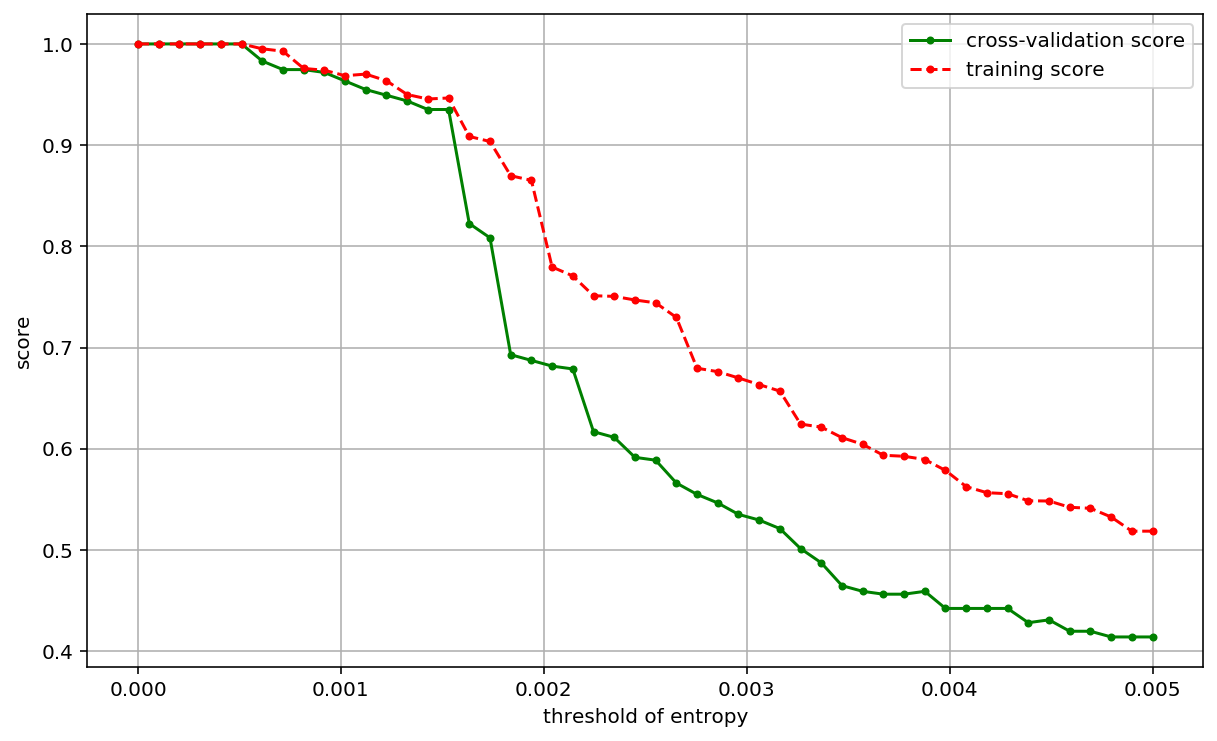

In [315]:
# 训练模型，并计算评分
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.005, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出模型参数与模型评分的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [220]:
import numpy as np  
X_train = data.iloc[:5000,0:3]
y_train = data.iloc[:5000,3]
X_test = data.iloc[5001,0:3]
y_test = data.iloc[5002,3]
X_new = np.array(X_test).reshape(1, -1)
Y_new = np.array(Y_test).reshape(1, -1)